In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [9]:
x_train = np.array([[10., -10., 20.],
                   [20., 0., 0.],
                   [0., 10., -10.]])

In [10]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [11]:
x_transformed = scaler.transform(x_train)
x_transformed

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [12]:
x_train.std()

10.657403385139377

In [13]:
x_transformed.std()

1.0

In [14]:
x_train.mean(axis=0)

array([10.        ,  0.        ,  3.33333333])

In [15]:
x_transformed.mean(axis=0)

array([0., 0., 0.])

In [17]:
#---------------------- возьмем сумпл побольше-------------------------------


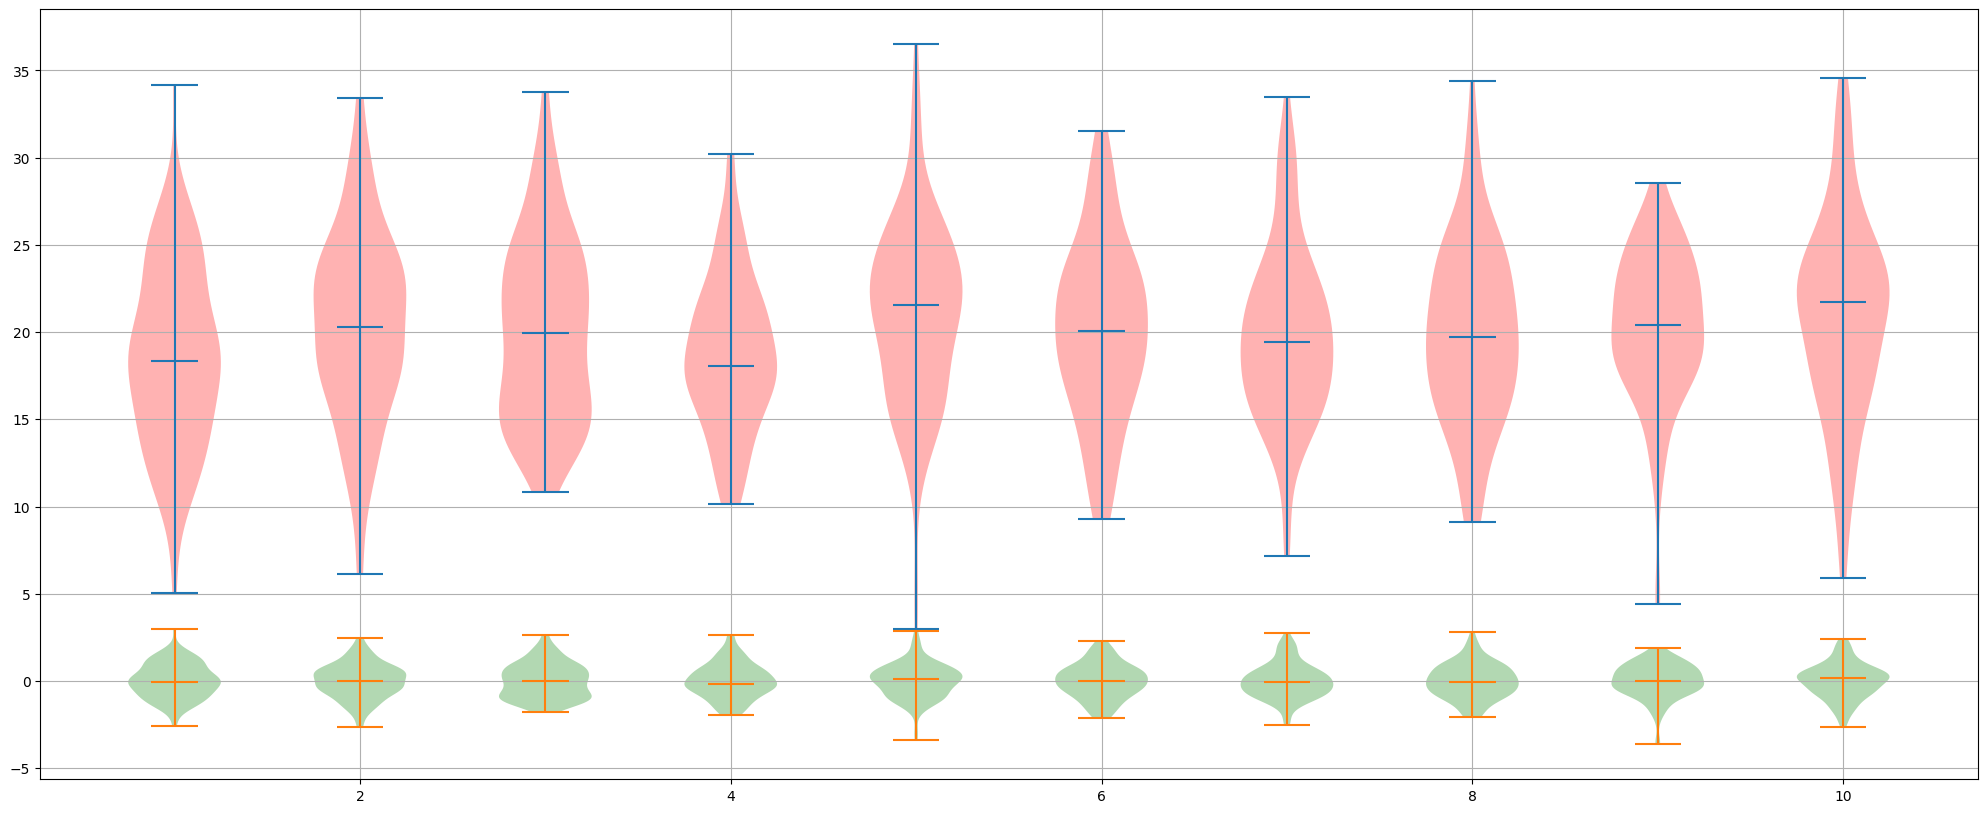

In [30]:
sample = np.random.randn(100, 10)*5+20

plt.figure(figsize=(25,10))
plt.grid()

violin_parts = plt.violinplot(sample[:,:], showmedians=True)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')

scale_sample = preprocessing.StandardScaler().fit_transform(sample)
violin_parts = plt.violinplot(scale_sample[:,:], showmedians=True)

for pc in violin_parts['bodies']:
    pc.set_facecolor('green')

In [32]:
#-------------------------------- Scaling to a range ----------------------------------

min_max_scale = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scale.fit_transform(x_train)
x_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [34]:
min_max_scale = preprocessing.MinMaxScaler((-5, 5))
x_train_minmax = min_max_scale.fit_transform(x_train)
x_train_minmax

array([[ 0.        , -5.        ,  5.        ],
       [ 5.        ,  0.        , -1.66666667],
       [-5.        ,  5.        , -5.        ]])

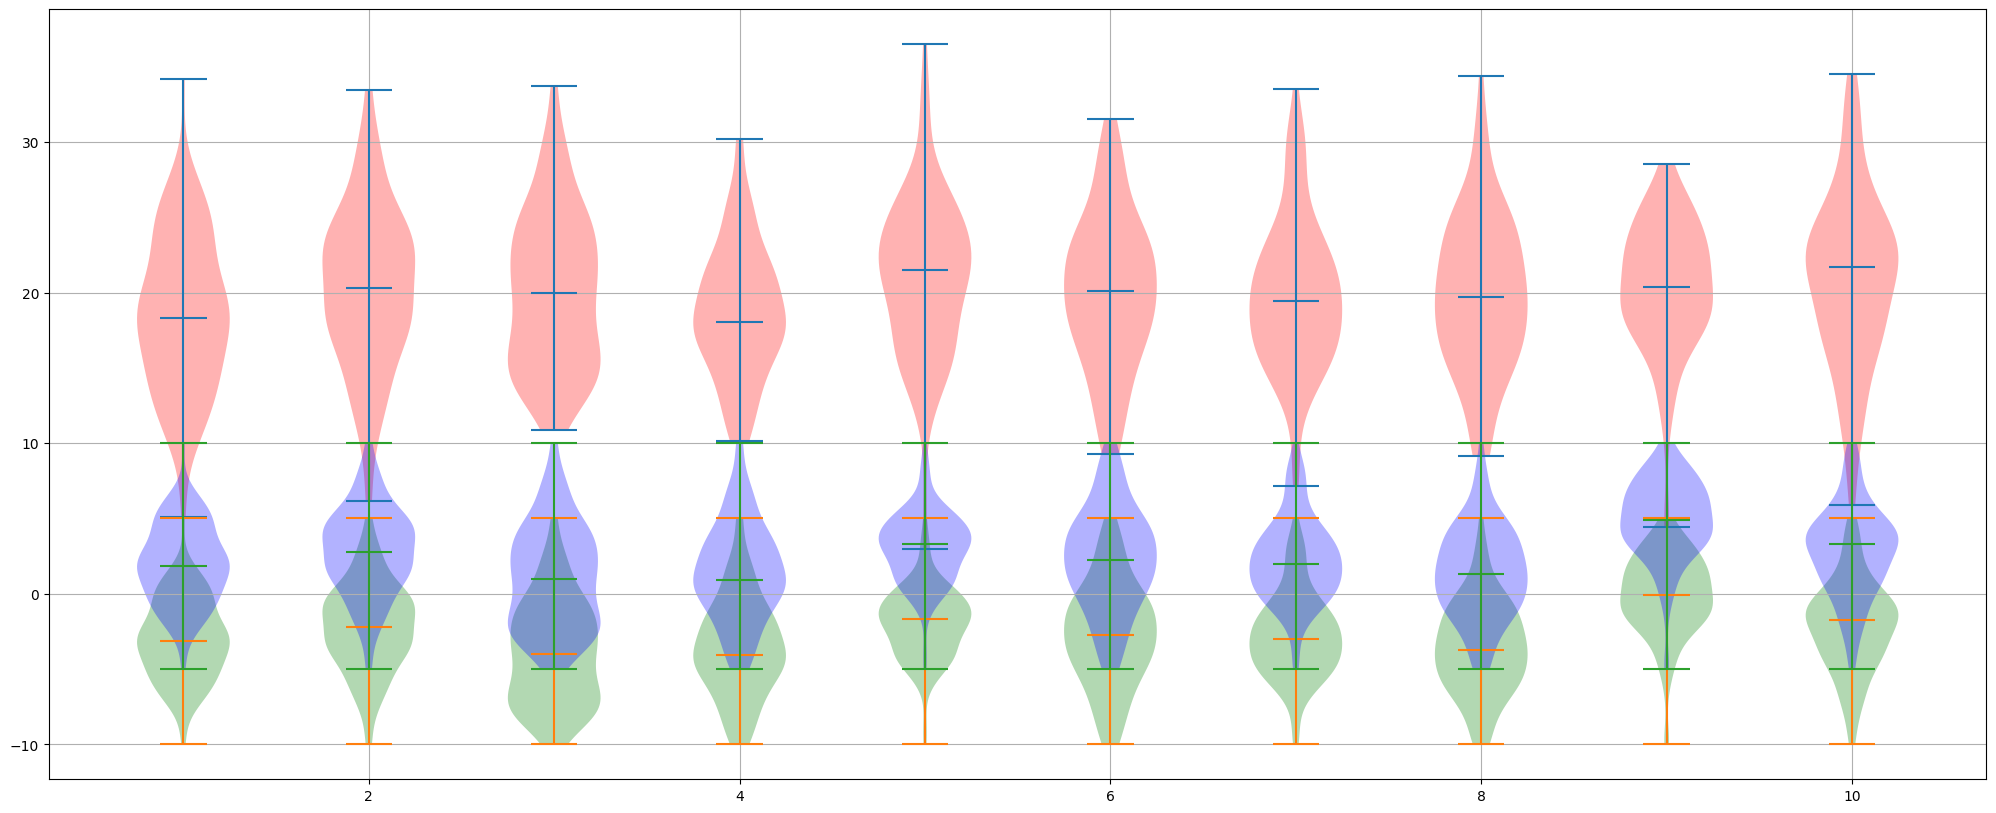

In [35]:
plt.figure(figsize=(25,10))
plt.grid()

violin_parts = plt.violinplot(sample[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')

scale_sample_1 = preprocessing.MinMaxScaler((-10, 5)).fit_transform(sample)
scale_sample_2 = preprocessing.MinMaxScaler((-5, 10)).fit_transform(sample)

violin_parts = plt.violinplot(scale_sample_1[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('green')

violin_parts = plt.violinplot(scale_sample_2[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('blue')

In [36]:
#------------------------- Mapping to a Uniformdistribution -------------------------------------
#---------------------- равномерное распределение -------------------------------------

quantile_transformer = preprocessing.QuantileTransformer(random_state=0)


In [37]:
sample = np.random.randn(100, 10)

In [38]:
sample_transformed = quantile_transformer.fit_transform(sample)

c:\Users\and_b\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


In [39]:
quantiles = np.arange(100)

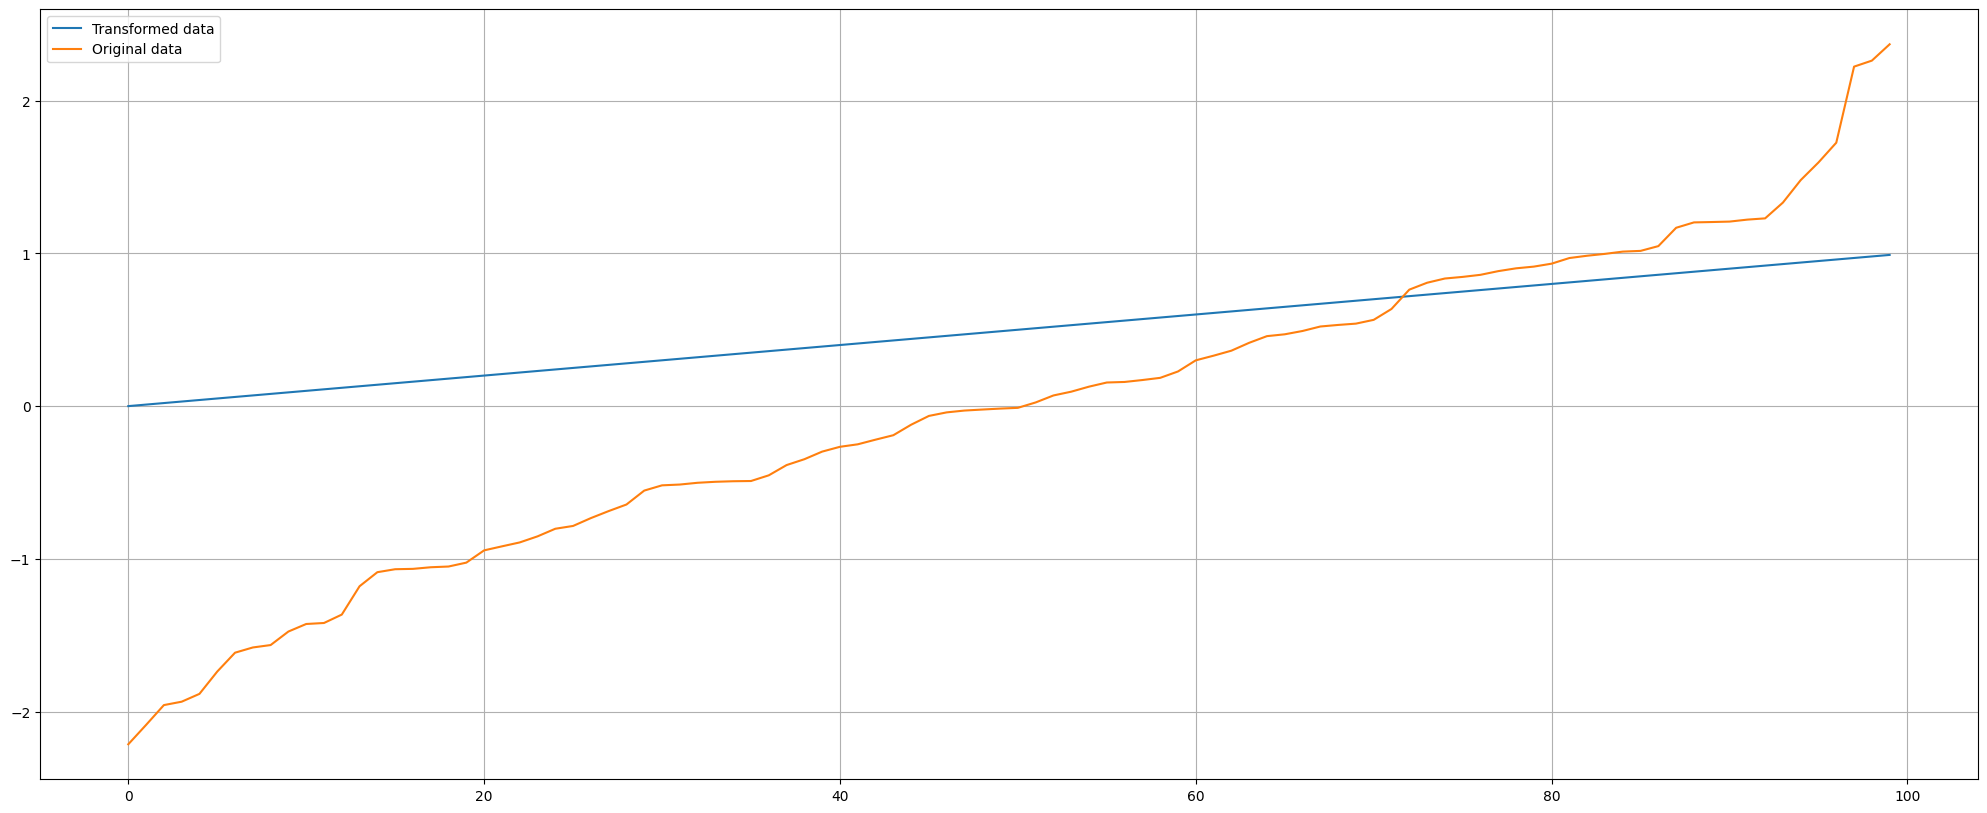

In [40]:
plt.figure(figsize=(25,10))
plt.grid()

plt.plot(quantiles, np.percentile(sample_transformed[:,0], quantiles), label='Transformed data')
plt.plot(quantiles, np.percentile(sample[:,0], quantiles), label='Original data')
plt.legend()

In [41]:
#----------------------------------- нормальное распределение-------------------------------------
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)

In [48]:
sample = np.random.triangular(0, 1, 3, size=(1000, 10))

In [49]:
sample_transformed = quantile_transformer.fit_transform(sample)

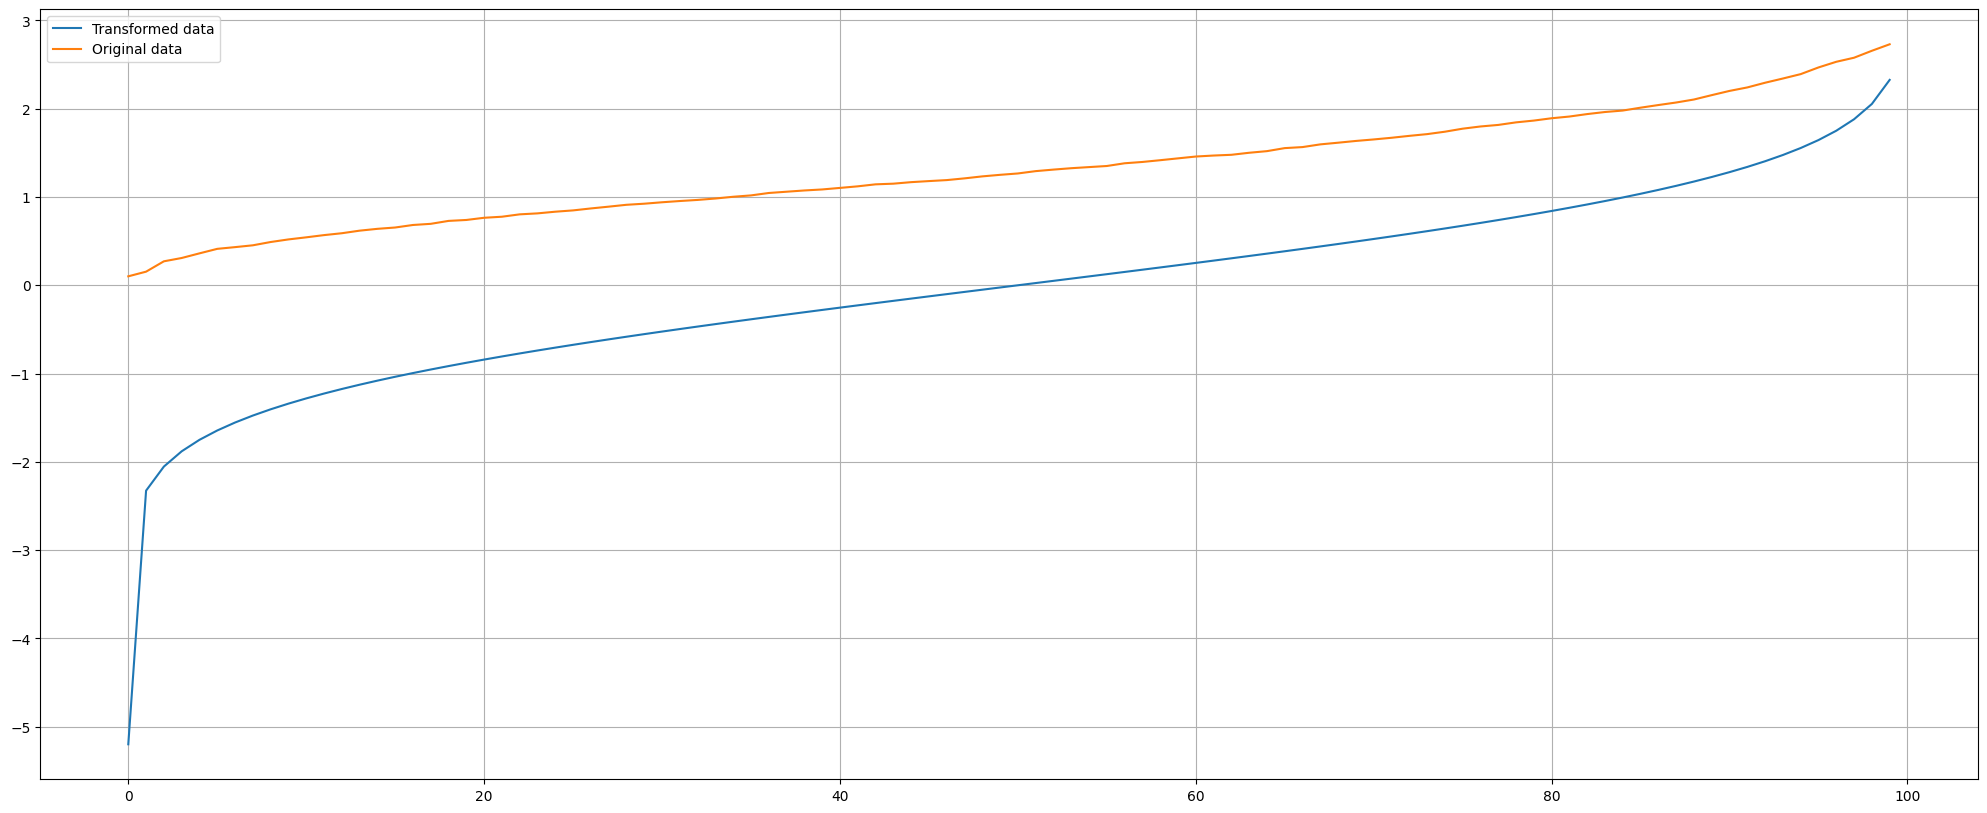

In [50]:
plt.figure(figsize=(25,10))
plt.grid()

plt.plot(quantiles, np.percentile(sample_transformed[:,0], quantiles), label='Transformed data')
plt.plot(quantiles, np.percentile(sample[:,0], quantiles), label='Original data')
plt.legend()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1b95226ed90>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1b94d1975d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1b94d195150>,
 'cbars': <matplotlib.collections.LineCollection at 0x1b94d16f410>}

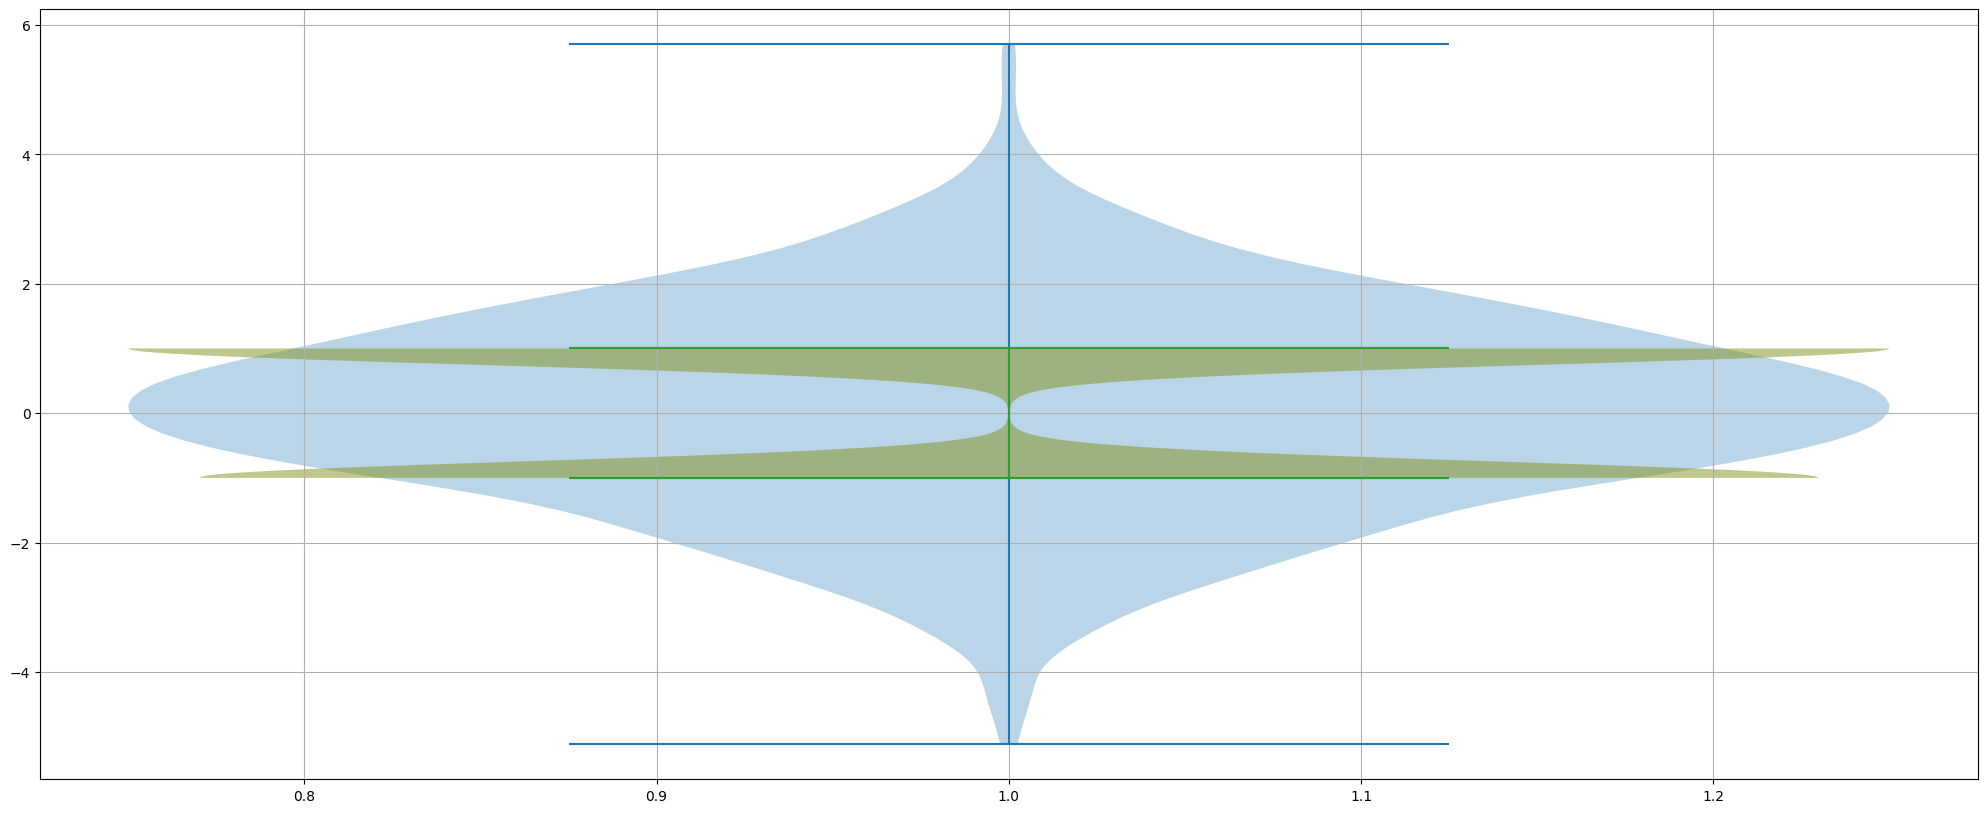

In [52]:
#-------------------------------- Normalize (нормализация) ---------------------------------

x = np.random.randn(1000, 1)*1.5

normalizer_l2 = preprocessing.Normalizer(norm='l2').fit(x)
normalizer_l1 = preprocessing.Normalizer(norm='l1').fit(x)

x_norm_l2 = normalizer_l2.transform(x)
x_norm_l1 = normalizer_l1.transform(x)

plt.figure(figsize=(25, 10))
plt.grid()
plt.violinplot(x)
plt.violinplot(x_norm_l2)
plt.violinplot(x_norm_l1)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1b94d1cbd10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1b94d1b4c90>,
 'cmins': <matplotlib.collections.LineCollection at 0x1b94c218e10>,
 'cbars': <matplotlib.collections.LineCollection at 0x1b94d0e3290>}

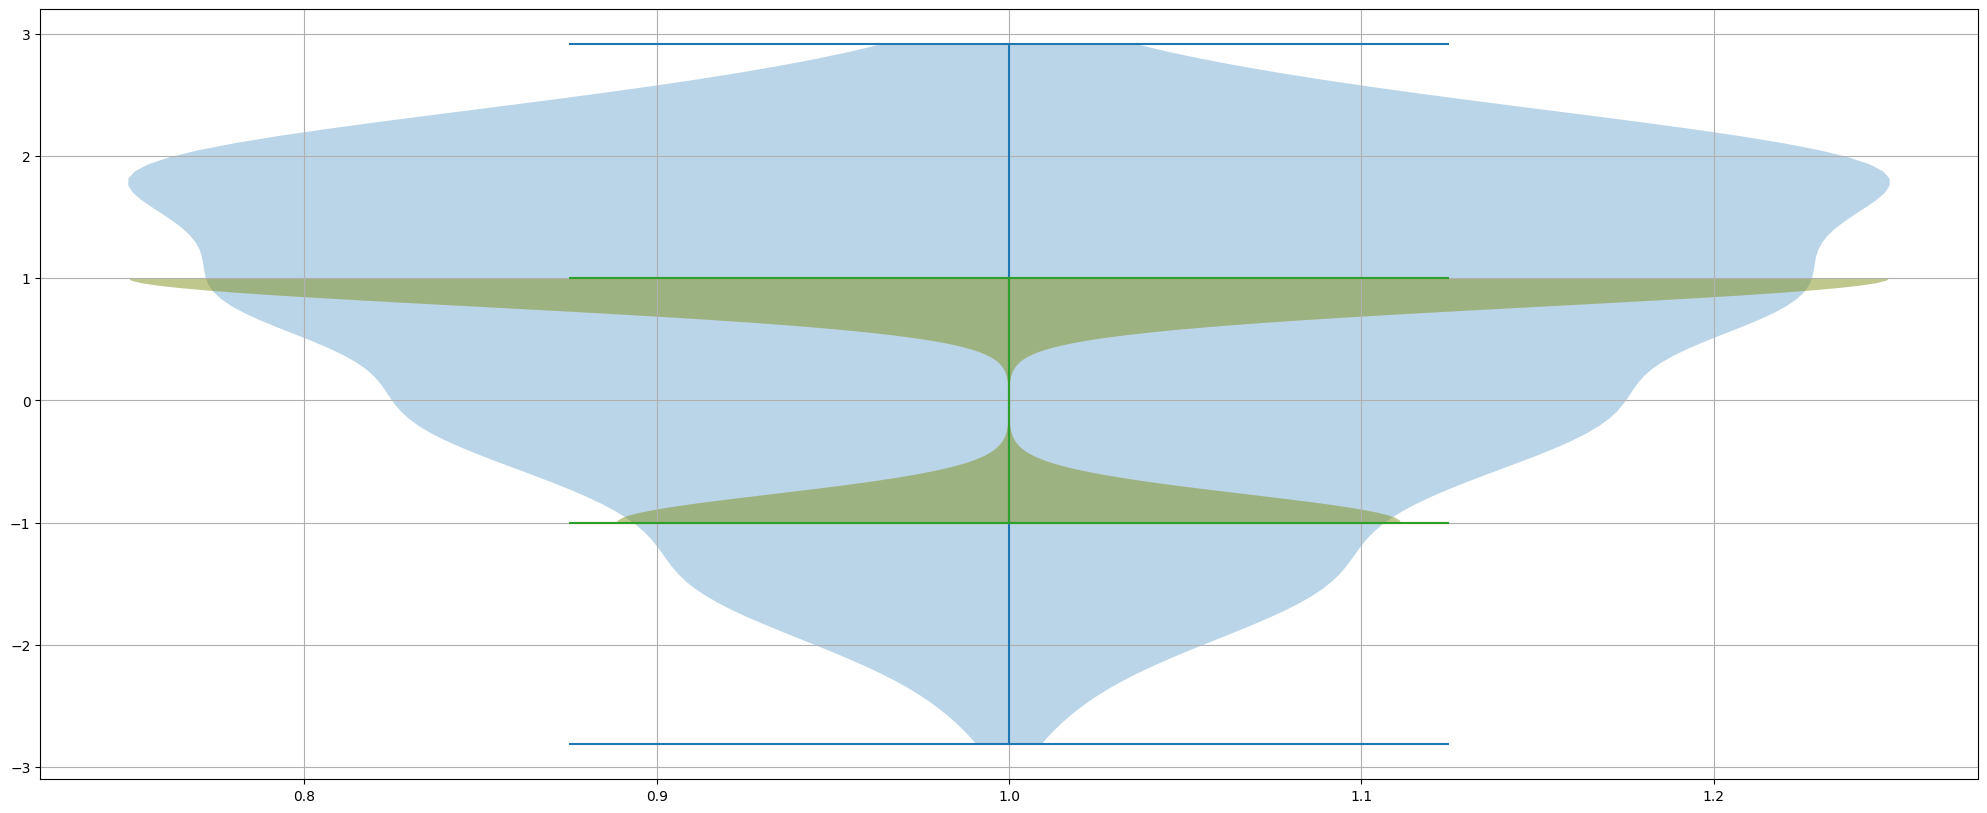

In [54]:
x = np.random.triangular(-3, 2, 3, size=(1000, 1))#*1.5

normalizer_l2 = preprocessing.Normalizer(norm='l2').fit(x)
normalizer_l1 = preprocessing.Normalizer(norm='l1').fit(x)

x_norm_l2 = normalizer_l2.transform(x)
x_norm_l1 = normalizer_l1.transform(x)

plt.figure(figsize=(25, 10))
plt.grid()
plt.violinplot(x)
plt.violinplot(x_norm_l2)
plt.violinplot(x_norm_l1)

In [56]:
#--------------------------------- V Train test split (разбивка на тест кусочки выборки) ------------------------------------

x_full = np.array([[[x, y] for y in np.linspace(-np.sqrt(9-x**2), np.sqrt(9-x**2),50)] for x in np.arange(-3, 3, 0.01)])

In [57]:
x_full.shape

(600, 50, 2)

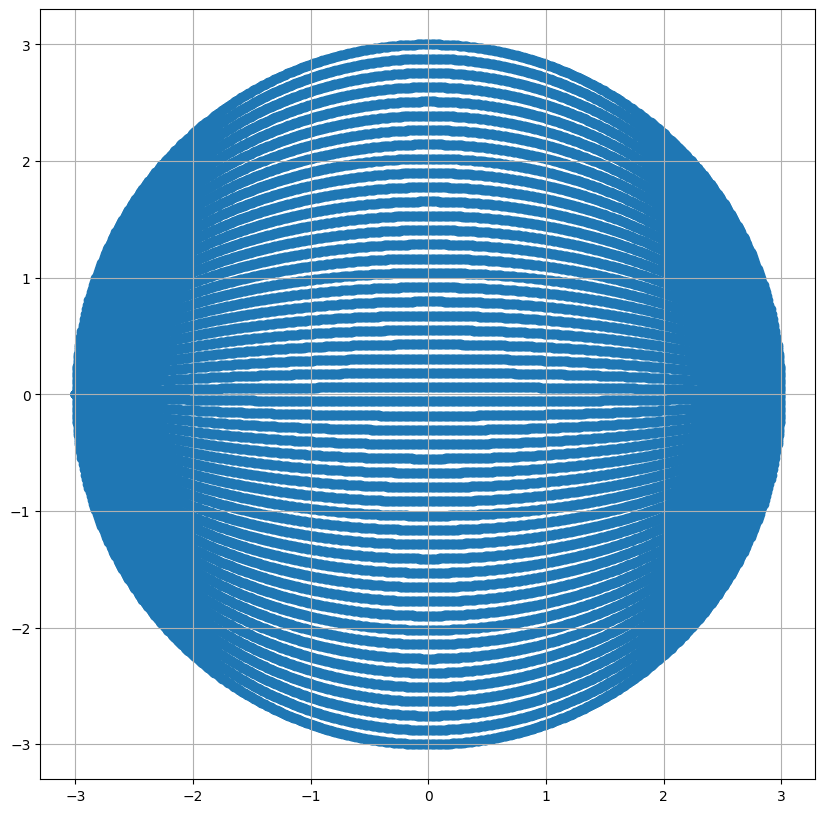

In [64]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(x_full.reshape(-1, 2)[:,0], x_full.reshape(-1, 2)[:,1])

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_full, x_full, test_size=0.2, shuffle=False)

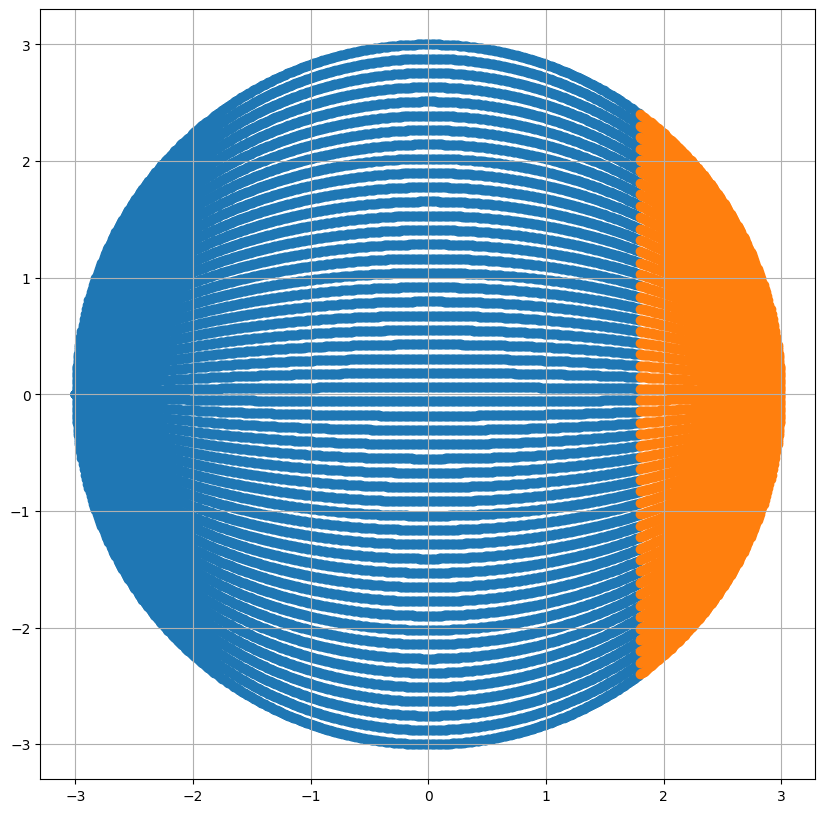

In [69]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(x_train.reshape(-1, 2)[:,0], x_train.reshape(-1, 2)[:,1])
plt.scatter(x_test.reshape(-1, 2)[:,0], x_test.reshape(-1, 2)[:,1])

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_full, x_full, test_size=0.2, shuffle=True)

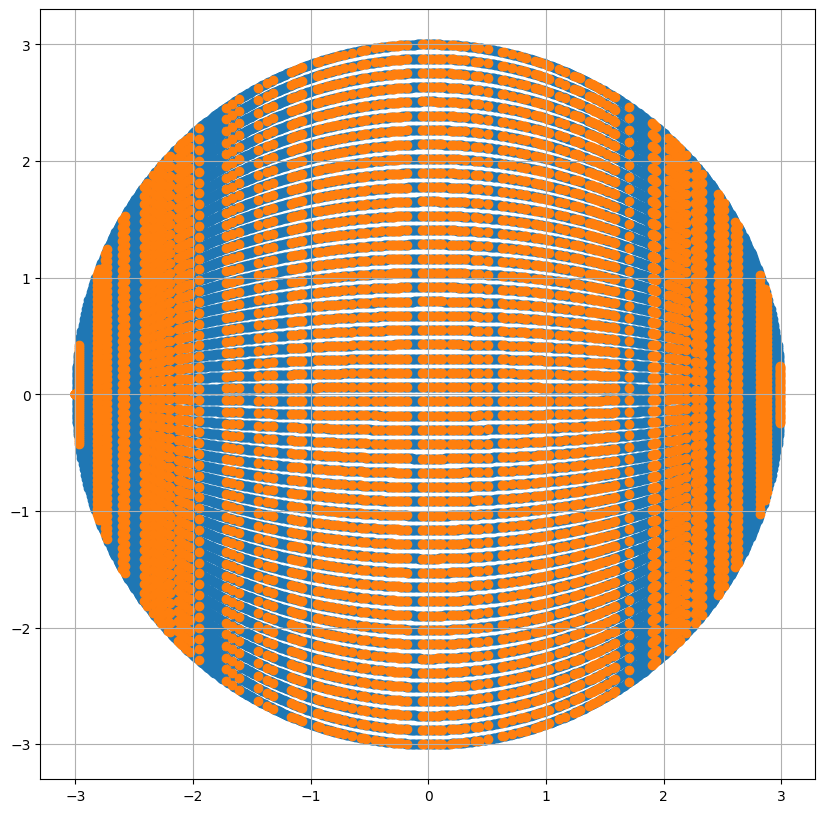

In [71]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(x_train.reshape(-1, 2)[:,0], x_train.reshape(-1, 2)[:,1])
plt.scatter(x_test.reshape(-1, 2)[:,0], x_test.reshape(-1, 2)[:,1])

In [7]:
####################################### STATSMODELS ##################################################
plt.style.use('ggplot')

In [76]:
nsample = 100

x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**3))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

X = sm.add_constant(X)
y = np.dot(X, beta)+e

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.587e+08
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:19:21   Log-Likelihood:                -125.33
No. Observations:                 100   AIC:                             256.7
Df Residuals:                      97   BIC:                             264.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9677      0.226      4.282      0.0

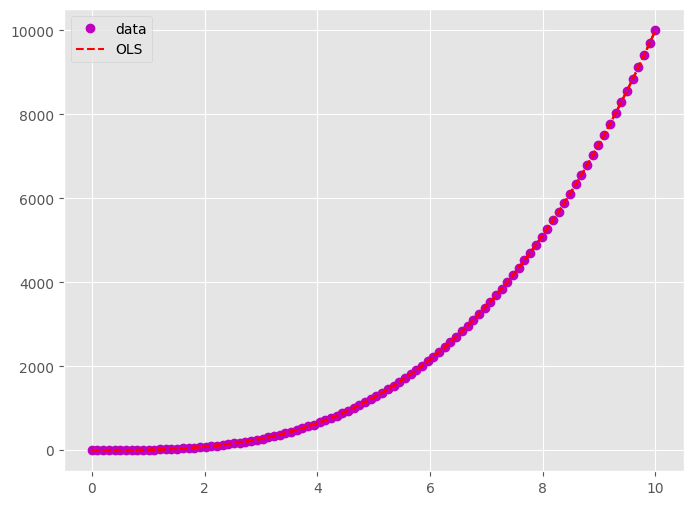

In [79]:
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label= "data", c= "m")
ax.plot(x, results.fittedvalues, "r--", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc='best')

In [82]:
#-------------------------------- нелинейный случай------------------------------
nsample = 50
sig = 0.5

x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig*np.random.normal(size=nsample)


In [83]:
res = sm.OLS(y,X).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     193.4
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           4.41e-26
Time:                        16:00:09   Log-Likelihood:                -36.757
No. Observations:                  50   AIC:                             81.51
Df Residuals:                      46   BIC:                             89.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4876      0.028     17.629      0.0

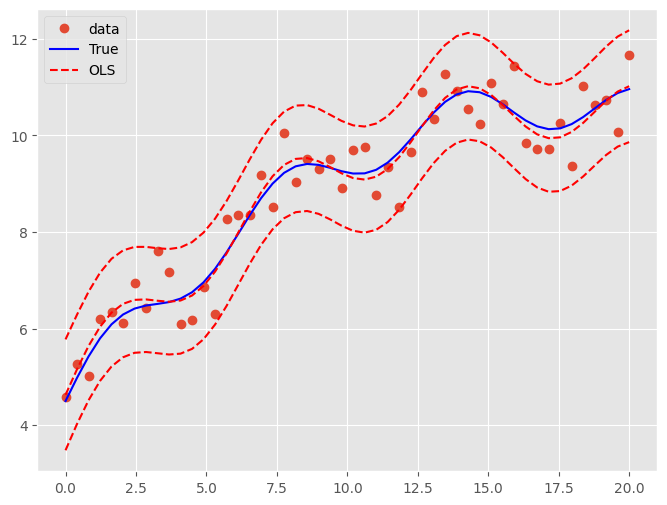

In [85]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label= "data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc='best')

In [2]:
#-------------------- фильтр Ходрика-Прескона (HP) ---------------------------------

dta = sm.datasets.macrodata.load_pandas().data
index = pd.Index(sm.tsa.datetools.dates_from_range("1959Q1", "2009Q3"))
dta.index = index
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(dta.realgdp)

In [3]:
dta

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


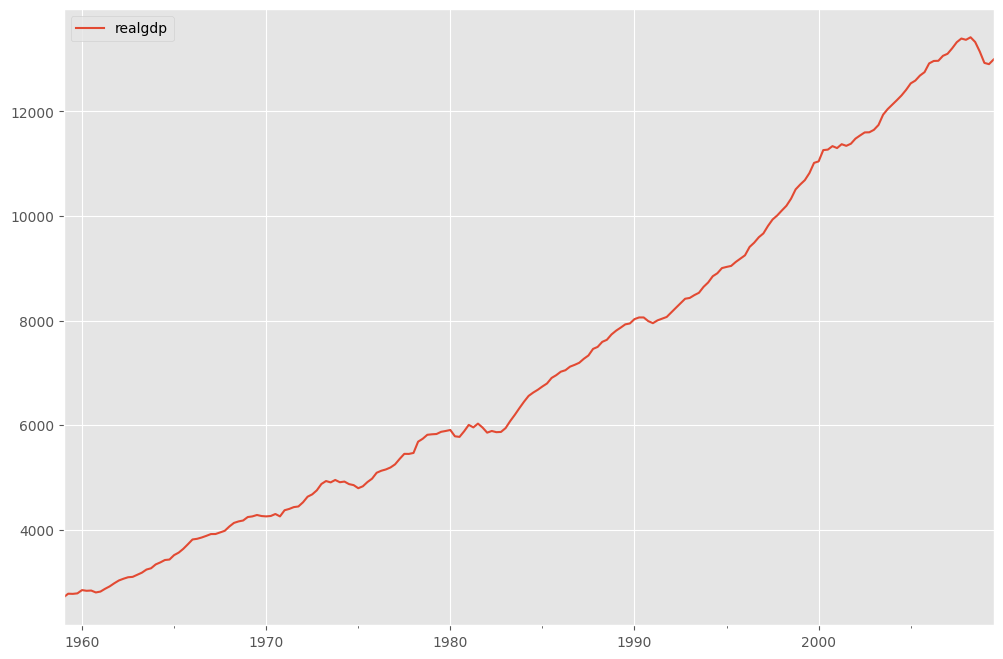

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
dta.realgdp.plot(ax= ax)
legend = ax.legend(loc="upper left")
legend.prop.set_size(20)

In [11]:
gdp_decomp = dta[["realgdp"]].copy()
gdp_decomp["cycle"] = gdp_cycle
gdp_decomp["trend"] = gdp_trend

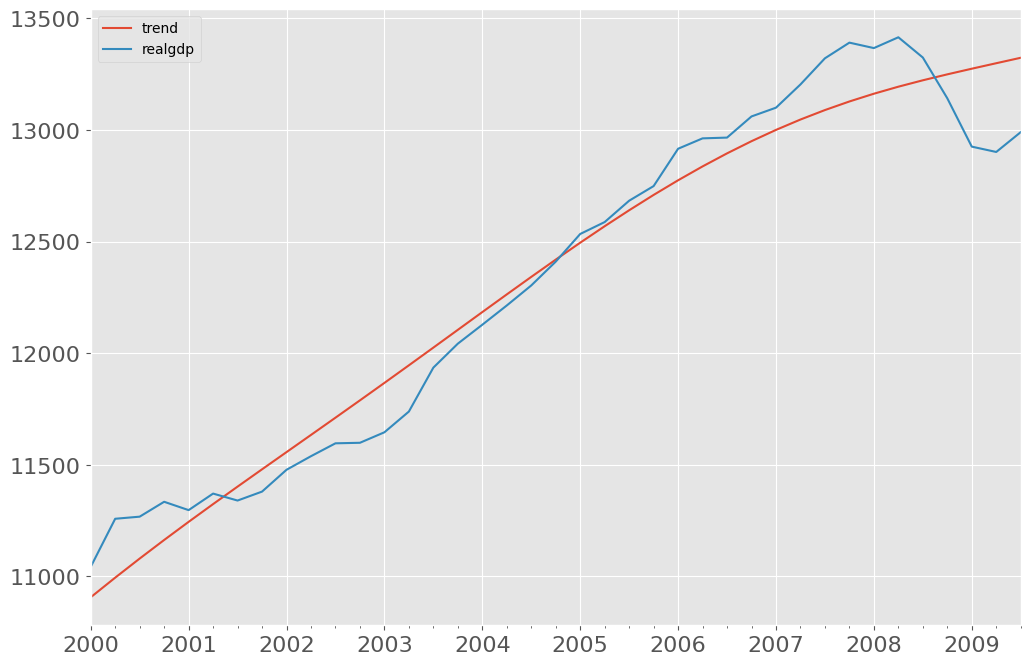

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
gdp_decomp[["trend", "realgdp"]]["2000-03-31":].plot(ax=ax, fontsize=16)
legend = ax.get_legend()
legend.prop.set_size(20)

In [ ]:
#---------------------------------- Статистичемка модель для обработки текстов -------------------------------------------
train_text = []
train_labels = []

test_text = []
test_labels = []

fp_train_text = open('../../')